## HW 3

# Q1 - Read the data
[Q1 8 points] Read the data. Read in the data from http://www.stat. ufl.edu/~winner/data/clinton1.dat. Note that this is NOT a CSV file. The description of the data fields are present in http://www.stat.ufl. edu/~winner/data/clinton1.txt. You will have to figure out the right parameters for the read csv command yourself (e.g., the regular expression for the delimiter, and the names of the columns).

<h5>Data Description</h5>
<table>
    <tr>
        <th>Column Name</th>
        <th>Position</th>
        <th>DataFrame Name</th>
    </tr>
    <tr>
        <td>County Name</td>
        <td>1-38</td>
        <td>County</td>
    </tr>
    <tr>
        <td>Percent voting for Clinton in 1992</td>
        <td>40-45</td>
        <td>percentVoting</td>
    </tr>
    <tr>
        <td>Median Age</td>
        <td>49-52</td>
        <td>Age</td>
    </tr>
    <tr>
        <td>Mean Savings (&#36;)</td>
        <td>56-61</td>
        <td>Savings</td>
    </tr>
    <tr>
        <td>PerCapita Income (&#36;)</td>
        <td>65-69</td>
        <td>Income</td>
    </tr>
    <tr>
        <td>Percent in Poverty</td>
        <td>73-77</td>
        <td>Poverty</td>
    </tr>
    <tr>
        <td>Percent Veterans</td>
        <td>81-85</td>
        <td>Veterans</td>
    </tr>
    <tr>
        <td>Percent Female</td>
        <td>89-94</td>
        <td>Female</td>
    </tr>
    <tr>
        <td>Population Density</td>
        <td>98-105</td>
        <td>Density</td>
    </tr>
    <tr>
        <td>Percent in Nursing Homes</td>
        <td>109-114</td>
        <td>NursingHomes</td>
    </tr>
    <tr>
        <td>Crime Index (Per capita)</td>
        <td>118-123</td>
        <td>CrimeIndex</td>
    </tr>    
</table>

### Method:

Read in the data using read_csv: <br />
    (1) put "County" as the index column because it is a unique index for each row <br />
    (2) use more the regular expression for more than 2 whitespaces to delimiter each column <br />
    (3) show the first 5 rows to check the data <br />

In [1]:
from pandas import Series, DataFrame
import pandas as pd

%pylab inline

#using pandas with a column specification   
Clinton_df = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat',
                           sep = '\s\s+',
                           index_col = 'County',
                           header=None,
                           names = ('County', 'percentVoting', 'Age', 'Savings','Income', 'Poverty'
                                    , 'Veterans', 'Female', 'Density', 'NursingHomes', 'CrimeIndex'),
                           engine = 'python'
                        )

#show the first ten lines of data
Clinton_df[:5]

Populating the interactive namespace from numpy and matplotlib


,percentVoting,Age,Savings,Income,Poverty,Veterans,Female,Density,NursingHomes,CrimeIndex
County,,,,,,,,,,
"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141


# Q2 - Predict percentVoting
[Q2 8 points] Predict percentVoting on all regressors. One of the
fields in the data is “Percent voting for Clinton in 1992”; let’s call it percentVoting. Regress percentVoting on all available regressors. Which two regressors
have the worst p-values?

### Method

(1) import the special packages for doing multiple regression <br />
(2) create the dmatrices for y and X. "County" is not used because it is just an index for each row, and using it will not help the model performance <br />
(3) show the y, and X to check whether the dmatrices is working <br />
(4) set up the regression model and fit the model<br />
(5) show the p-values for the regression result and compare the p-values<br />


In [2]:
# Import the Special packages
import statsmodels.api as sm
from patsy import dmatrices

# Step 1: Create design matrices
y, X = dmatrices('percentVoting ~ Age + Savings + Income \
                                  + Poverty + Veterans + Female\
                                   + Density + NursingHomes + CrimeIndex' 
                 , data=Clinton_df 
                 , return_type='dataframe')

In [3]:
#show the first 5 rows of y
print "show y:"
y[:5]

show y:


,percentVoting
County,
"Autauga, AL",30.92
"Baldwin, AL",26.24
"Barbour, AL",46.36
"Blount, AL",32.92
"Bullock, AL",67.67


In [4]:
#show the first five rows of X
print "show X:"
X[:5]

show X:


,Intercept,Age,Savings,Income,Poverty,Veterans,Female,Density,NursingHomes,CrimeIndex
County,,,,,,,,,,
"Autauga, AL",1.0,31.7,57623.0,15768.0,15.2,10.74,51.41,60.4,2.36,457.0
"Baldwin, AL",1.0,35.5,84935.0,16954.0,13.6,9.73,51.34,66.5,5.40,282.0
"Barbour, AL",1.0,32.8,83656.0,15532.0,25.0,8.82,53.03,28.8,7.02,47.0
"Blount, AL",1.0,34.5,61249.0,14820.0,15.0,9.67,51.15,62.4,2.36,185.0
"Bullock, AL",1.0,31.7,75725.0,11120.0,33.0,7.08,50.76,17.6,2.91,141.0


In [5]:
# Step 2: set up and fit the regression model using y and X and get a series of the pvalue
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
#result.summary()
p_values_df = DataFrame(result.pvalues)

#the worse 2 p-values
print ("The two regressors that have the worse p-values: ")
print p_values_df.sort_values(by = 0, ascending=False)[:2]

The two regressors that have the worse p-values: 
                   0
Age         0.238619
CrimeIndex  0.141950


# Q3 - A formula-creating function
[Q3 8 points] A formula-creating function. Write a function called "formula" that takes a list of regressors as input, and outputs the formula for regressing "percentVoting" on these regressors.<br/>

For example, "formula([’age’, ’savings’])" should output "percentVoting ∼ age + savings".

### Method
(1) create a string variable called formula and populate the variable with 'percentVoting' to start <br/>
(2) use a for loop to loop through the regressors_list, and add the regressors to the formula string <br/>
(3) return the formula

In [6]:
def formula(regressors_list):
    
    formula = 'percentVoting ~ '
    for regressors in regressors_list:
        if regressors != regressors_list[-1]:
            formula += regressors + ' + '
        else:
            formula += regressors
    return formula
    

#testing
print formula(['age','saving'])            

percentVoting ~ age + saving


# Q4 - R-squared computation function
[Q4 8 points] R-squared computation function. Write a function called "rsquared" that, given a list of regressors, returns the R-squared corresponding to a regression of "percentVoting" with respect to the list of regressors. <br/>

You can use the "formula" function you wrote above.

### Method
(1) use the formula function to create the string to put into the dmatrices, for creating y, and X for regression <br/>
(2) use dmatrices to define y, X <br/>
(3) set up the regression model and fit the regression model <br/>
(4) return the rsqured from the model result

In [7]:
def rsquared(regressors_list):
    
    
    y, X = dmatrices(str( formula(regressors_list) )
                     , data=Clinton_df 
                     , return_type='dataframe')
    
    model = sm.OLS(y, X)       # Set up the model
    result = model.fit()       # Fit model (find the intercept and slopes)
    rq = result.rsquared
    
    return rq

#test to check the result
print rsquared( ['Age','Savings'] )

0.0197670966596


# Q5 - Find the next best regressor
[Q5 8 points] Find the next best regressor. Write a function called
"best_next_regressor" that, given a list of regressors (called "current_regressor_list") and the list of all possible regressors (called "all_regressors_list"), picks one regressor from "all_regressors_list that, when combined with the regressors in "current_regressor_list", yields the highest R-square. <br/><br/>
The function should return this regressor, and the corresponding R-square.


### Method 
(1) define a varible for the best r-squre so that we can compare with it <br/>
(2) define a varible for the best next regressor, so that we can record it <br/>
(3) loop through the regressors in all_regressors_list one by one, and append them to a copy of the current_regressors_list, named as temp_regressors_list<br/>
(4) put this temp_regressors_list into the rsquared function created above, and return a r-square than can compared to the best r-square we have so far <br/>
(5) if it is better, update the best r-square and best regressors

In [8]:
import copy 

def best_next_regressor(current_regressor_list, all_regressors_list):
    
    # if nothing in the current_regressor_list, 
    # the current best r-squre should be 0
    if len(current_regressor_list) == 0:
        best_rsquared = 0
    # else, the current best r-squre should be that from the current_regressor_list
    else:
        best_rsquared = rsquared(current_regressor_list)  
        
    best_regressor = ""
    
    for regressor in all_regressors_list:
        
        temp_regressors_list = copy.deepcopy(current_regressor_list)

        if (regressor not in current_regressor_list) and (regressor != 'percentVoting'):
            temp_regressors_list.append(regressor)
            temp_rsquare = rsquared(temp_regressors_list)
         
            if temp_rsquare > best_rsquared:
                best_rsquared = temp_rsquare
                best_regressor = regressor
                
    return best_regressor, best_rsquared

#test 
out_regressor, out_rsquared = best_next_regressor(['Age','Savings'], list(Clinton_df))
print "The next best regressor and rsquared respectively is:", out_regressor,",", out_rsquared

The next best regressor and rsquared respectively is: Poverty , 0.253668669744


# Q6 - Pick the k best regressors
[Q6 8 points] Pick the k best regressors. Write a function called "best_regressors" that takes two arguments: <br\ >
• "num_regressors", which is the number of regressors we want, and<br\ >
• "all_regressors_list", which again is the list of all possible regressors.<br\ ><br\ >
The function should compute the best "num_regressors" regressors by picking them one at a time using "best_next_regressor" that you wrote above. The function should return a tuple of the following items:<br\ >
• a list of the best regressors, in the order in which they were picked, and<br\ >
• the corresponding R-square values.<br\ ><br\ >
In other words, you want a list of the results of calling "best_next_regressor".<br\ >

### Method 
(1) create a empty list to append the best_regressors each time we got from the best_next_regressor function <br/>
(2) use a for loop to run num_regressors time the the best_next_regressor function, and get populate the list of the best_regressors <br/>
(3) return the best_regressors list and the corresponding r-square to these regressors

In [9]:
def best_regressors (num_regressors, all_regressors_list):
    best_regressors = [] 
    best_rsquares = []
    regressors_and_rsquares = []
    temp = ()
    for i in range(num_regressors):
        #out_regressor, out_rsquared = best_next_regressor(best_regressors, all_regressors_list)
        temp = (best_next_regressor(best_regressors, all_regressors_list))
        best_regressors.append(temp[0])
        regressors_and_rsquares.append(temp)
                
    return regressors_and_rsquares

#test
print best_regressors(3,list(Clinton_df))

[('Poverty', 0.25103851961631973), ('Density', 0.28582980229105803), ('Female', 0.30914506632485805)]


# Q7 - Order all regressors in the best order
[Q7 8 points] Order all regressors in the best order. Run "best_regressors" to output all available regressors in sequence. In other words, the first item
in the result should be the best single regressor, the second item should be
the next best regressor that combined with the first regressor gives the best R-square, and so on. <br/>
This idea of ordering the regressors in this particular order is called forward selection, and is one way of selecting only a few regressors when given a large set of regressors.

### Method
run best_regressors by inputing len(list(Clinton))-1 and list(Clinton_df), which is the list of the column header

In [10]:
 print best_regressors(len(list(Clinton_df))-1,list(Clinton_df))


[('Poverty', 0.25103851961631973), ('Density', 0.28582980229105803), ('Female', 0.30914506632485805), ('Savings', 0.31924118502370491), ('Veterans', 0.32299256887291683), ('NursingHomes', 0.32485127138693681), ('Income', 0.32582492389958861), ('CrimeIndex', 0.32655325570492555), ('Age', 0.32690038725174031)]


# Q8 - Plot 
[Q8 8 points] Plot the R-squared values as regressors are added in the best order.

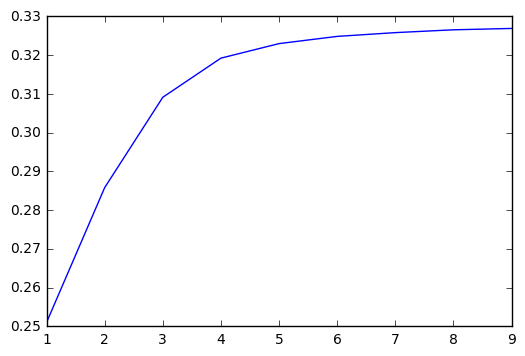

In [11]:
# if not labling the x axis

plot_data = {}
for i in range(len(list(Clinton_df))-1):
    temp = best_regressors(i+1,list(Clinton_df))
    out_rsquared = temp[i][1]
    plot_data.update({i+1 : out_rsquared})
plot(Series(plot_data))

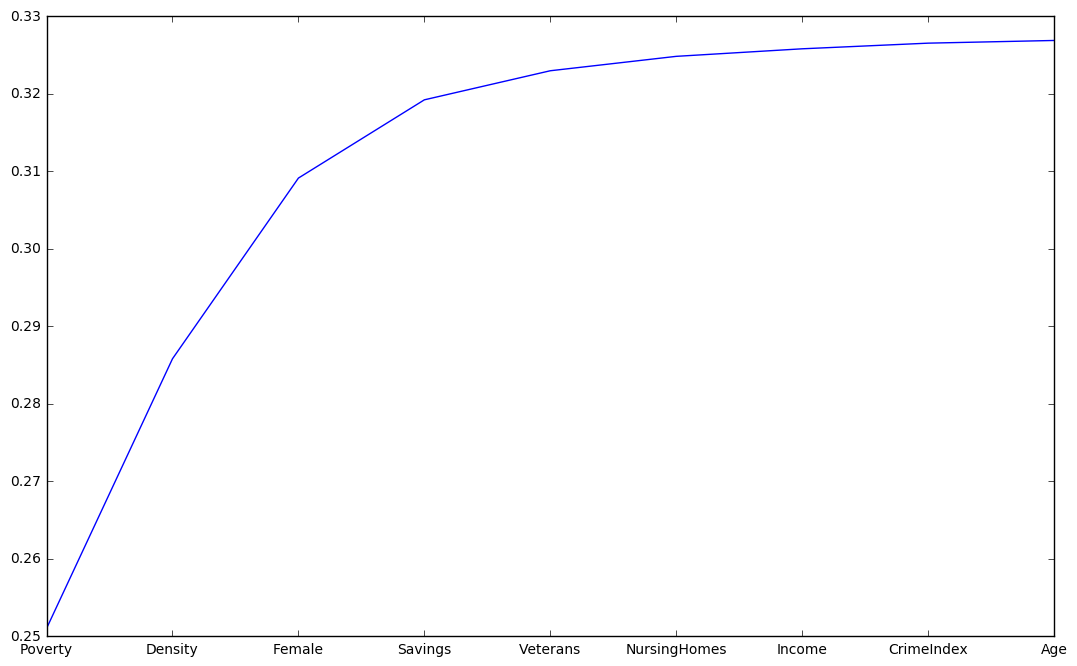

In [12]:
#if labling the x-axis 

import matplotlib.pyplot as plt
import numpy as np

temp = best_regressors(len(list(Clinton_df))-1,list(Clinton_df))
out_regressors = []
out_rsquared = temp[0][1]
y_data = []
for i in range(len(list(Clinton_df))-1):
    temp = best_regressors(i+1,list(Clinton_df))
    out_regressors.append(temp[i][0])
    out_rsquared = temp[i][1]
    y_data.append(out_rsquared)

x_list = []
for i in range(len(temp)):
    x_list.append(i+1)

    
    
x = np.array(x_list)
y = np.array(y_data)

my_xticks = out_regressors
plt.figure(figsize=(13,8))
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()


# K-Nearest Neighbors Classification
<br/>
We will work with the same dataset as above.

# Q9 - Create a classification target
[Q9 8 points] Create a classification target. Attach a new column, called target to the DataFrame, whose value for each row is either 1 (if percentVoting is at least 40:0), or 0 (percentVoting is less than 40:0).

### Method 

(1) make a deepcopy of the Clinton_df DataFrame, so that we won't modify any work above  <br\>
(2) create a mask = Clinton_df_copy['percentVoting'] >= 40  <br\>
(3) create a new column name target with all 0 as the values   <br\>
(4) use the ix method, and the mask, to update the DataFrame

In [13]:
from copy import deepcopy
Clinton_df_copy = deepcopy(Clinton_df)
mask = (Clinton_df_copy['percentVoting'] >= 40)
Clinton_df_copy['target'] = 0
Clinton_df_copy.ix[mask, 'target'] = 1

# show the first 10 rows to check the results
Clinton_df_copy[['percentVoting', 'target']] [:10]

,percentVoting,target
County,,
"Autauga, AL",30.92,0
"Baldwin, AL",26.24,0
"Barbour, AL",46.36,1
"Blount, AL",32.92,0
"Bullock, AL",67.67,1
"Butler, AL",47.43,1
"Calhoun, AL",38.44,0
"Chambers, AL",45.36,1
"Cherokee, AL",53.61,1


# Q10 - Create training and test sets
[Q10 8 points] Create training and test sets. Create design matrices for predicting the target using just the two features poverty and popdensity. Split this into design matrices for training and testing datasets, with 70% data being used for training, and 30% for testing.

### Method 
(1) use dmatrices to get Y, and X <br\>
(2) import the train_test_split from sklean.model selection to split the data into test and training data <br\>


In [14]:
Y, X = dmatrices('target ~ 0 + Poverty + Density', Clinton_df_copy, return_type="dataframe")

#test
print 'Design matrix X'
print X[:5]
print 'Outcomes Y'
print Y[:5]

Design matrix X
             Poverty  Density
County                       
Autauga, AL     15.2     60.4
Baldwin, AL     13.6     66.5
Barbour, AL     25.0     28.8
Blount, AL      15.0     62.4
Bullock, AL     33.0     17.6
Outcomes Y
             target
County             
Autauga, AL     0.0
Baldwin, AL     0.0
Barbour, AL     1.0
Blount, AL      0.0
Bullock, AL     1.0


In [15]:
# create the training and test set after dmatrices give us Y and X
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#test
X_train.count(), X_test.count()

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(Poverty    1892
 Density    1892
 dtype: int64, Poverty    812
 Density    812
 dtype: int64)

# Q11 - Accuracy of classification
[Q11 12 points] Accuracy of classification. Use a K-nearest neighbors classifier to predict the target using the two given features, using 1, 3, 5, 10, 20, 50, 100, and 1000 nearest neighbors respectively. Print out the training and test accuracy for each of these.

### Method 
(1) create a list to record the number of nearest neighbors we need to test, the list has 1, 3, 5, 10, 20, 50, 100, and 1000 nearest neighbors respectively. <br \ >
(2) loop through the item in the list one by one, so that we get the training and test accuracy for each of these <br \>
(3) inside the loop, we build the model with KNeighborsClassifier, fit the model, use the model to predict, and get the accuracy of training and test set respectively <br \>
(4) print out the accuracy for each case

In [16]:
from sklearn import neighbors
from sklearn import metrics

num_neighbors = [1, 3, 5, 10, 20, 50, 100, 1000]

for num in num_neighbors:
    
    model = neighbors.KNeighborsClassifier(n_neighbors = num,
                                           weights = 'uniform',
                                           p=2)
    # fit the model
    model.fit(X_train, y_train)
    
    #accuracy on training set
    predicted_classes_train = model.predict(X_train)
    print "Accuracy on training data using %d nearest neighbors"%(num), metrics.accuracy_score(y_train, predicted_classes_train)

    #accuracy on test set
    predicted_classes = model.predict(X_test)
    print "Accuracy on test data using %d nearest neighbors"%(num), metrics.accuracy_score(y_test, predicted_classes)
    print 


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy on training data using 1 nearest neighbors 0.997885835095
Accuracy on test data using 1 nearest neighbors 0.600985221675

Accuracy on training data using 3 nearest neighbors 0.788054968288
Accuracy on test data using 3 nearest neighbors 0.635467980296

Accuracy on training data using 5 nearest neighbors 0.748414376321
Accuracy on test data using 5 nearest neighbors 0.630541871921

Accuracy on training data using 10 nearest neighbors 0.720401691332
Accuracy on test data using 10 nearest neighbors 0.646551724138

Accuracy on training data using 20 nearest neighbors 0.690274841438
Accuracy on test data using 20 nearest neighbors 0.658866995074

Accuracy on training data using 50 nearest neighbors 0.683932346723
Accuracy on test data using 50 nearest neighbors 0.662561576355

Accuracy on training data using 100 nearest neighbors 0.677589852008
Accuracy on test data using 100 nearest neighbors 0.663793103448

Accuracy on training data using 1000 nearest neighbors 0.567124735729
Acc

# Q12 - Plots and reasons
[Q12 8 points] Plots and reasons. Show a scatter plot of popdensity versus poverty, and color the points according to the target (i.e., each point in the scatter plot represents a county, and the color of the county depends on the value of target for that county). Can you interpret the plot? What types of counties voted for Bill Clinton?

### Method

plot the target as required. lable taget = 0 as black, and target = 1 as red

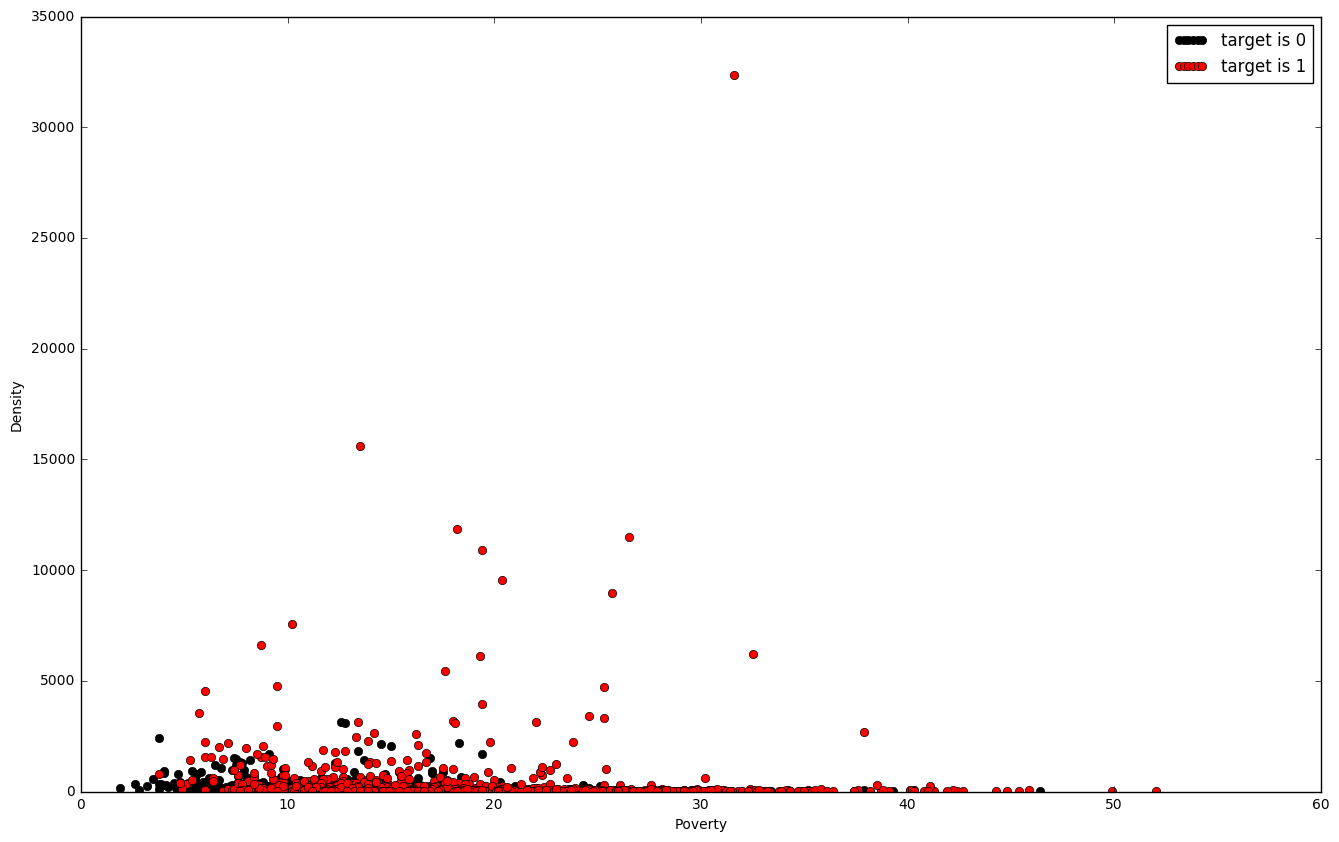

In [17]:
target0 = Clinton_df_copy[Clinton_df_copy['target'] == 0]
target1 = Clinton_df_copy[Clinton_df_copy['target'] == 1]
Clinton_df_copy

plt.figure(figsize=(16,10))
plot(target0['Poverty'], target0 ['Density'], marker='o', color='black', linestyle='None', label='target is 0')
plot(target1['Poverty'], target1 ['Density'], marker='o', color='red', linestyle='None', label='target is 1')

xlabel('Poverty')
ylabel('Density')

legend(numpoints=6, loc='best')
plt.show()


### Reasoning for this question: 

(1) Generally, the counties with high density (more than 5000) votes for Cliton and <br \>
(2) More counties of percent in poverty more than 10 votes for Clinton than those that did not vote for Cliton
<br \> Note that there are still a lot of counties of percent in poverty more than 10 not vote for Cliton, they are just overshaded by a larger number of counties that vote for Clinton in the scatterplot above 
